In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Dual Listing Arbitrage

### Abstract

We will explore a strategy called **dual listing arbitrage**. It aims to identify arbitrage opportunities between two stock exchanges trading the same stock. The algorithm searches for the possibility of a mismatch and trades on it. Next to that, it takes into account certain limits, which is set to a max position of 200 to prevent massive losses if the algorithm malfunctions. Before the implementation we will briefly cover the underlying theory. Finally, we analyze the results and arrive at conclusion followed by few thoughts for further consideration.

## Contents

1. <a href='#Concepts'>Concepts</a>
2. <a href='#Implementation'>Implementation</a>
3. <a href='#Results and conclusion'>Results and conclusion</a>
4. <a href='#Further considerations'>Further considerations</a>

## 1. Concepts
<a id='Concepts'></a>

### Arbitrage

1. Arbitrage is a situation / opportunity where one can make a certain **risk-free** positive profit
2. A common example is - dual listing arbitrage
 * For instance, a stock might be listed on multiple exchanges. Whenever there is a mismatch in the pricing of that stock on exchanges, one can earn a risk-free profit by entering into a trade where they buy the stock from the exhange where the price is lower and simultaneously sell it on another exchange where the stock is trading at a higher price. The profit will be the price differential
3. In real world, such risk-free opportunities are short lived and the **transaction costs** might be bigger than the price differential

**_Note_**:
1. Ask price is same as Offer price (just 2 different names referring to same things - the price at which the seller is ready to sell)
2. Arbitrage is only possible if **Bid** Price is higher than the **Ask** Price

## 2. Implementation
<a id='Implementation'></a>

### Price data

We have price data at 5 minute interval for 2 Indian dual-listed stocks listed on NSE (National Stock Exchange) and BSE (Bombay Stock Exchange). The companies are PTC India (*ticker: PTC, an energy company*) and Rural Electrification Corporation of India (*ticker: REC, an electricity providing company*).

Here we will do the implementation for PTC India.

### PTC India (*ticker: PTC*)

### Read data

We will read data from our csv file as a **DataFrame** using **pandas** package

In [2]:
# function to read data from our csv file

def read_data(filename):
    '''
    This reads the .csv stored at the 'filename' location and returns a DataFrame
    with two-level columns. The first level column contains the Exchange and the 
    second contains the type of market data, e.g. bid/offer, price/volume(qty).
    '''
    df = pd.read_csv(filename, index_col = 0)
    df.columns = [df.columns.str[-3:], df.columns.str[:-4]]

    return df

In [3]:
# read the data for PTC India
filename = 'PTC.csv'
market_data = read_data(filename)

In [4]:
# visualization of the columns in the DataFrame
market_data.head(20)

NSE                                     BSE          \
               Bid Price Bid Qty Offer Price Offer Qty Bid Price Bid Qty   
Date time                                                                  
01/01/21 9:15     113.45     111      113.80        96    112.80      31   
01/01/21 9:20     113.40     104      113.75       110    113.05      29   
01/01/21 9:25     113.25     114      113.60       102    113.15      31   
01/01/21 9:30     113.25     119      113.55       100    113.15      34   
01/01/21 9:35     113.25     123      113.55       106    113.10      34   
01/01/21 9:40     113.20     124      113.50        98    112.85      33   
01/01/21 9:45     113.10     131      113.45       101    112.70      33   
01/01/21 9:50     113.40     127      113.70       103    113.20      34   
01/01/21 9:55     113.45     125      113.80       114    113.20      34   
01/01/21 10:00    113.30     112      113.65       100    113.15      32   
01/01/21 10:05    113.30      99      113.65        93    113.05      30   
01/01/21 10:10    113.15     119      113.45       106    113.10      37   
01/01/21 10:15    112.80     117      113.10       110    112.75      39   
01/01/21 10:20    112.80     121      113.15       111    112.50      41   
01/01/21 10:25    113.05     109      113.40       107    112.80      40   
01/01/21 10:30    113.05     119      113.40       121    113.05      40   
01/01/21 10:35    113.00     113      113.35       106    112.95      36   
01/01/21 10:40    112.90     125      113.25       125    112.80      45   
01/01/21 10:45    112.90     117      113.25       132    112.80      43   
01/01/21 10:50    113.10     114      113.45       125    112.80      42   

                                      
               Offer Price Offer Qty  
Date time                             
01/01/21 9:15       113.75        34  
01/01/21 9:20       113.90        37  
01/01/21 9:25       114.05        38  
01/01/21 9:30       114.00        36  
01/01/21 9:35       113.95        39  
01/01/21 9:40       113.70        41  
01/01/21 9:45       113.60        45  
01/01/21 9:50       114.15        42  
01/01/21 9:55       114.20        43  
01/01/21 10:00      114.15        37  
01/01/21 10:05      114.10        34  
01/01/21 10:10      114.05        40  
01/01/21 10:15      113.65        33  
01/01/21 10:20      113.40        35  
01/01/21 10:25      113.75        33  
01/01/21 10:30      114.00        38  
01/01/21 10:35      113.90        39  
01/01/21 10:40      113.80        39  
01/01/21 10:45      113.85        44  
01/01/21 10:50      113.75        43

### Plot the price data

To get a visual sense of how the stock is trading simultaneously on both the exchanges, we will plot the price data.

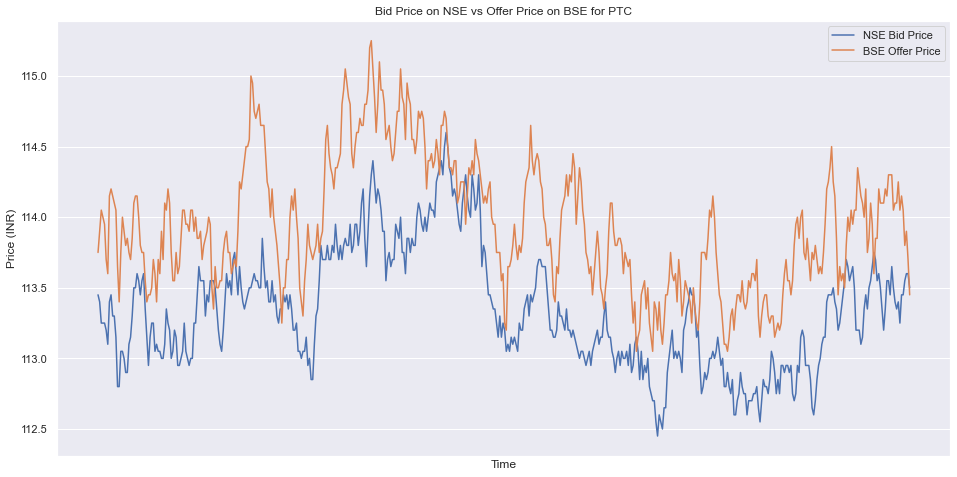

In [5]:
# select the first 500 rows
market_data_500 = market_data.iloc[:500]

# set figsize of plot
plt.figure(figsize = (16, 8))

# create a plot showing the bid and ask prices on different exchanges
def plot_bid_ask(stock1 = 'NSE', stock2 = 'BSE'):
    plt.plot(market_data_500.index, market_data_500[stock1, 'Bid Price'])
    plt.plot(market_data_500.index, market_data_500[stock2, 'Offer Price'])
    plt.xticks([])
    plt.xlabel('Time')
    plt.ylabel('Price (INR)')
    plt.title(f'Bid Price on {stock1} vs Offer Price on {stock2} for PTC')
    plt.legend([f"{stock1} Bid Price", f"{stock2} Offer Price"])
    plt.show();

plot_bid_ask()

### Calculate spread

Calculate spread (Bid on exchange 1 - Offer on exchange 2) and store them as separate columns in our DataFrame.

In [6]:
# add spread columns to DataFrame
market_data['NSE Bid - BSE Offer Spread'] = market_data['NSE', 'Bid Price'] - market_data['BSE', 'Offer Price']
market_data['BSE Bid - NSE Offer Spread'] = market_data['BSE', 'Bid Price'] - market_data['NSE', 'Offer Price']
market_data.head(20)

NSE                                     BSE          \
               Bid Price Bid Qty Offer Price Offer Qty Bid Price Bid Qty   
Date time                                                                  
01/01/21 9:15     113.45     111      113.80        96    112.80      31   
01/01/21 9:20     113.40     104      113.75       110    113.05      29   
01/01/21 9:25     113.25     114      113.60       102    113.15      31   
01/01/21 9:30     113.25     119      113.55       100    113.15      34   
01/01/21 9:35     113.25     123      113.55       106    113.10      34   
01/01/21 9:40     113.20     124      113.50        98    112.85      33   
01/01/21 9:45     113.10     131      113.45       101    112.70      33   
01/01/21 9:50     113.40     127      113.70       103    113.20      34   
01/01/21 9:55     113.45     125      113.80       114    113.20      34   
01/01/21 10:00    113.30     112      113.65       100    113.15      32   
01/01/21 10:05    113.30      99      113.65        93    113.05      30   
01/01/21 10:10    113.15     119      113.45       106    113.10      37   
01/01/21 10:15    112.80     117      113.10       110    112.75      39   
01/01/21 10:20    112.80     121      113.15       111    112.50      41   
01/01/21 10:25    113.05     109      113.40       107    112.80      40   
01/01/21 10:30    113.05     119      113.40       121    113.05      40   
01/01/21 10:35    113.00     113      113.35       106    112.95      36   
01/01/21 10:40    112.90     125      113.25       125    112.80      45   
01/01/21 10:45    112.90     117      113.25       132    112.80      43   
01/01/21 10:50    113.10     114      113.45       125    112.80      42   

                                     NSE Bid - BSE Offer Spread  \
               Offer Price Offer Qty                              
Date time                                                         
01/01/21 9:15       113.75        34                      -0.30   
01/01/21 9:20       113.90        37                      -0.50   
01/01/21 9:25       114.05        38                      -0.80   
01/01/21 9:30       114.00        36                      -0.75   
01/01/21 9:35       113.95        39                      -0.70   
01/01/21 9:40       113.70        41                      -0.50   
01/01/21 9:45       113.60        45                      -0.50   
01/01/21 9:50       114.15        42                      -0.75   
01/01/21 9:55       114.20        43                      -0.75   
01/01/21 10:00      114.15        37                      -0.85   
01/01/21 10:05      114.10        34                      -0.80   
01/01/21 10:10      114.05        40                      -0.90   
01/01/21 10:15      113.65        33                      -0.85   
01/01/21 10:20      113.40        35                      -0.60   
01/01/21 10:25      113.75        33                      -0.70   
01/01/21 10:30      114.00        38                      -0.95   
01/01/21 10:35      113.90        39                      -0.90   
01/01/21 10:40      113.80        39                      -0.90   
01/01/21 10:45      113.85        44                      -0.95   
01/01/21 10:50      113.75        43                      -0.65   

               BSE Bid - NSE Offer Spread  
                                           
Date time                                  
01/01/21 9:15                       -1.00  
01/01/21 9:20                       -0.70  
01/01/21 9:25                       -0.45  
01/01/21 9:30                       -0.40  
01/01/21 9:35                       -0.45  
01/01/21 9:40                       -0.65  
01/01/21 9:45                       -0.75  
01/01/21 9:50                       -0.50  
01/01/21 9:55                       -0.60  
01/01/21 10:00                      -0.50  
01/01/21 10:05                      -0.60  
01/01/21 10:10                      -0.35  
01/01/21 10:15                      -0.35  
01/01/21 10:20            

### Spot arbitrage opportunities

Spot arbitrage opportunities i.e. when Bid price on an exchange is higher than Ask price on another exchange. We do this by applying this condition to our DataFrame and filtering out the rows that satisfy the condition.

In [7]:
# create new DataFrame containing all arbitrage opportunities for comparison
arbitrage = market_data.loc[(market_data['NSE Bid - BSE Offer Spread'] > 0) | 
                            (market_data['BSE Bid - NSE Offer Spread'] > 0)]
arbitrage.head(20)

NSE                                     BSE          \
               Bid Price Bid Qty Offer Price Offer Qty Bid Price Bid Qty   
Date time                                                                  
01/01/21 15:05    113.55     130      113.85       112    112.70      37   
01/01/21 15:10    113.55     129      113.85       113    112.55      38   
01/01/21 16:10    113.70     131      114.05       122    112.70      45   
01/01/21 16:15    113.75     136      114.05       133    112.80      50   
01/01/21 17:10    113.55      80      113.90       106    114.00      28   
01/01/21 18:40    113.35      96      113.60        98    112.45      27   
02/01/21 1:05     113.85     131      114.10        97    114.20      33   
02/01/21 2:45     114.35     110      114.65        96    113.50      32   
02/01/21 4:05     114.30     108      114.55       111    113.20      34   
02/01/21 9:25     113.20     131      113.50       102    113.60      43   
02/01/21 9:30     113.15     125      113.40       106    113.55      39   
02/01/21 9:35     113.20     118      113.45       110    113.70      40   
02/01/21 9:40     113.15     109      113.45       121    113.60      42   
02/01/21 9:50     113.05     120      113.30       113    113.40      39   
02/01/21 9:55     113.00     126      113.30       116    113.55      41   
02/01/21 10:00    113.05     135      113.30       115    113.55      43   
02/01/21 10:05    113.05     141      113.30       102    113.35      41   
02/01/21 12:50    113.15     118      113.45       128    112.10      37   
02/01/21 15:35    113.50     126      113.75       117    112.75      43   
02/01/21 15:40    113.45     126      113.70       109    112.60      43   

                                     NSE Bid - BSE Offer Spread  \
               Offer Price Offer Qty                              
Date time                                                         
01/01/21 15:05      113.50        39                       0.05   
01/01/21 15:10      113.35        39                       0.20   
01/01/21 16:10      113.65        50                       0.05   
01/01/21 16:15      113.70        51                       0.05   
01/01/21 17:10      114.95        30                      -1.40   
01/01/21 18:40      113.25        40                       0.10   
02/01/21 1:05       114.95        38                      -1.10   
02/01/21 2:45       114.30        41                       0.05   
02/01/21 4:05       113.95        32                       0.35   
02/01/21 9:25       114.30        35                      -1.10   
02/01/21 9:30       114.25        35                      -1.10   
02/01/21 9:35       114.45        34                      -1.25   
02/01/21 9:40       114.35        32                      -1.20   
02/01/21 9:50       114.15        37                      -1.10   
02/01/21 9:55       114.35        39                      -1.35   
02/01/21 10:00      114.25        37                      -1.20   
02/01/21 10:05      114.05        40                      -1.00   
02/01/21 12:50      113.05        42                       0.10   
02/01/21 15:35      113.40        38                       0.10   
02/01/21 15:40      113.25        39                       0.20   

               BSE Bid - NSE Offer Spread  
                                           
Date time                                  
01/01/21 15:05                      -1.15  
01/01/21 15:10                      -1.30  
01/01/21 16:10                      -1.35  
01/01/21 16:15                      -1.25  
01/01/21 17:10                       0.10  
01/01/21 18:40                      -1.15  
02/01/21 1:05                        0.10  
02/01/21 2:45                       -1.15  
02/01/21 4:05                       -1.35  
02/01/21 9:25                        0.10  
02/01/21 9:30                        0.15  
02/01/21 9:35                        0.25  
02/01/21 9:40                        0.15  
02/01/21 9:50             

## 3. Results and conclusion
<a id='Results and conclusion'></a>

### Strategy

Time to code the strategy. 

Strategy is simple - as and when the arbitrage opportunity arises:
1. buy $min(Bid Qty, Ask Qty)$  number of shares at Ask Price (on exchange where Ask Price $<$ Bid Price of another exchange) and 
2. simultaneously sell those same number of shares at Bid Price on another exchange

Remember that we are applying an upper cap of 200 to protect ourselves from any algorithmic malfunction that could result in significant losses in portfolio. This way the **exposure** will not be significant.

In [8]:
# design arbitrage strategy

# initialize a "positions" dict that will keep track of date/time when opportunity arises
# ... and the positions that we take on the exchanges based on our above described strategy
# ... we will also calculate and store the profit spread and profit
# ... later on we will convert this dict into a DataFrame

positions = {'Timestamp': [],
             'Position NSE': [],
             'Position BSE': [],
             'Profit spread': [],
             'Profit': []
            }

current_position = 0

for time, mkt_data_at_time in market_data.iterrows():

    if mkt_data_at_time['NSE Bid - BSE Offer Spread', ''] > 0:                    # if spread > 0
        buy = min(mkt_data_at_time['NSE', 'Bid Qty'],                             # buy min(qty(s), cap)
                  mkt_data_at_time['BSE', 'Offer Qty'], (200 - current_position))
        spread = mkt_data_at_time['NSE Bid - BSE Offer Spread']                   # spread
        positions['Timestamp'].append(time)                                       # store date/time
        positions['Position NSE'].append(- buy - current_position)
        positions['Position BSE'].append(+ buy + current_position)
        positions['Profit spread'].append(mkt_data_at_time['NSE', 'Bid Price'] -  # profit spread
                                         mkt_data_at_time['BSE', 'Offer Price'])
        positions['Profit'].append(positions['Profit spread'][-1] *               # profit
                                  np.abs(positions['Position BSE'][-1]))
        current_position = buy

    elif mkt_data_at_time['BSE Bid - NSE Offer Spread', ''] > 0:
        buy = min(mkt_data_at_time['NSE', 'Bid Qty'],
                  mkt_data_at_time['BSE', 'Offer Qty'], (200 - current_position))
        spread = mkt_data_at_time['BSE Bid - NSE Offer Spread']
        positions['Timestamp'].append(time)
        positions['Position NSE'].append(+ buy + current_position)
        positions['Position BSE'].append(- buy - current_position)
        positions['Profit spread'].append(mkt_data_at_time['BSE', 'Bid Price'] -
                                         mkt_data_at_time['NSE', 'Offer Price'])
        positions['Profit'].append(positions['Profit spread'][-1] * 
                                  np.abs(positions['Position BSE'][-1]))
        current_position = buy

positions = pd.DataFrame(positions).set_index('Timestamp')

positions.head(20)

,Position NSE,Position BSE,Profit spread,Profit
Timestamp,,,,
01/01/21 15:05,-39.0,39.0,0.05,1.95
01/01/21 15:10,-78.0,78.0,0.20,15.60
01/01/21 16:10,-89.0,89.0,0.05,4.45
01/01/21 16:15,-101.0,101.0,0.05,5.05
01/01/21 17:10,81.0,-81.0,0.10,8.10
01/01/21 18:40,-70.0,70.0,0.10,7.00
02/01/21 1:05,78.0,-78.0,0.10,7.80
02/01/21 2:45,-79.0,79.0,0.05,3.95
02/01/21 4:05,-73.0,73.0,0.35,25.55


Above table shows the positions we end up taking based upon our strategy. Let's calculate how much profit this strategy has made!

### Profits

In [9]:
# total profits

print(f"Total profit: {positions['Profit'].sum():.2f} INR")

Total profit: 6289.80 INR


Sweet! But as they say - "*there is no free lunch*", such a simple strategy is too good to be true. In reality we are going to face many hurdles and complications that would make the strategy unfeasible or very less profitable. We will see few of such considerations in the last section.

### Conclusion

1. In this notebook, we went through the underlying theory for a dual listing arbitrage and implemented it
2. A dual listing arbitrage strategy aims to profit from the positive spread of mispricing as and when it happens
3. The strategy may look worth pursuing on papers. However, there are many other things to consider before we deploy it in real world trading

In the next and final section we list few of many considerations and scope of improvements pertaining to a dual listing arbitrage strategy.

## 4. Further considerations
<a id='Further considerations'></a>

In actual implementation of this strategy, we need to account for many other factors and issues which we have dropped here to avoid complications.

1. We can put an entry condition that we will only trade if the spread is at least a certain threshold, big enough to account for **transaction costs** and other risks 
2. In reality, we would be applying this strategy to many dual-listed stocks with high **volume**
3. We have not accounted for costs related to trading, market **slippage**, **liquidity** and security borrowing
4. At some exchanges this strategy may not be feasible. Traders may not be allowed to buy and sell the same stock on different exchanges on the same day
5. In real trading, the strategy would be implemented in **C++** instead of **Python** due to **latency** concerns
6. In addition to low latency, fast access to exchanges is also needed which is generally not feasible for retail traders


The above list is not exhaustive by any means. We have to consider many other factors (some unknown!) before implementing the strategy in real world.